# Notebook for Analyzing the Results of Search Experiments

checklist of data to collect for this: 
- 
- 
- 

## Basic Solve Rates


This graph just summarizes the macro level performance of the methods at a fixed budget.

In [4]:
import json
import matplotlib.pyplot as plt
from alphaarc.task import Task

In [22]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def compute_solve_rate(path): 
    with open(path) as f:
        data = json.load(f)
    solved = sum(1 for task in data if task['success'])
    return solved

def compute_table_data(methods, solved, total):
    rows = []
    for method, s in zip(methods, solved):
        s_int = int(s)
        rate = round((s_int / total) * 100, 1)
        rows.append({
            "Method": method,
            "Solved": s_int,
            "Total": total,
            "Solve Rate (%)": rate
        })
    return rows

# Compute solve results
mcts_results = compute_solve_rate('../results/mcts-2-0.2/experiment_results.json')
tg_mcts_results = compute_solve_rate('../results/tgmcts/experiment_results.json')
splint_mcts_results = compute_solve_rate('../results/splintmcts-4-0.2/experiment_results.json')

# Plotting
results = [mcts_results, tg_mcts_results, splint_mcts_results]
labels = ['MCTS', 'TG-MCTS', 'Splint-MCTS']
total = 89
table_rows = compute_table_data(labels, results, total)

for row in table_rows:
    print(row)

{'Method': 'MCTS', 'Solved': 0, 'Total': 89, 'Solve Rate (%)': 0.0}
{'Method': 'TG-MCTS', 'Solved': 5, 'Total': 89, 'Solve Rate (%)': 5.6}
{'Method': 'Splint-MCTS', 'Solved': 7, 'Total': 89, 'Solve Rate (%)': 7.9}


## Node Expansion Scalability

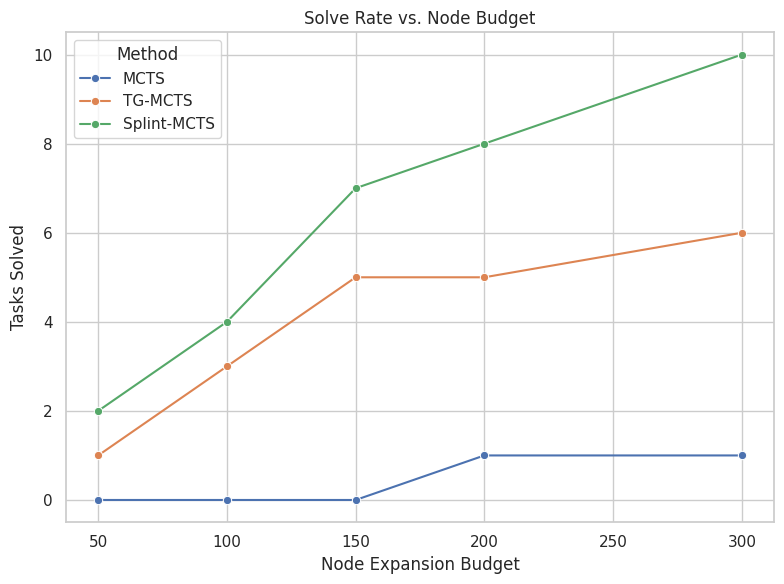

In [25]:

def node_expansion_plot(solve_rates, budgets): 
    # Convert to long-form DataFrame for seaborn
    data = []
    for method, rates in solve_rates.items():
        for budget, rate in zip(budgets, rates):
            data.append({"Method": method, "Node Budget": budget, "Solved Tasks": rate})

    df = pd.DataFrame(data)

    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    ax = sns.lineplot(data=df, x="Node Budget", y="Solved Tasks", hue="Method", marker="o")

    ax.set_title("Solve Rate vs. Node Budget")
    ax.set_ylabel("Tasks Solved")
    ax.set_xlabel("Node Expansion Budget")
    ax.legend(title="Method")
    plt.tight_layout()
    plt.show()


budgets = [50, 100, 150, 200, 300]

solve_rates = {
    "MCTS":        [0, 0, 0, 1, 1],
    "TG-MCTS":     [1, 3, 5, 5, 6],
    "Splint-MCTS": [2, 4, 7, 8, 10],
}


node_expansion_plot(solve_rates, budgets)

## Overlapping Efficiency

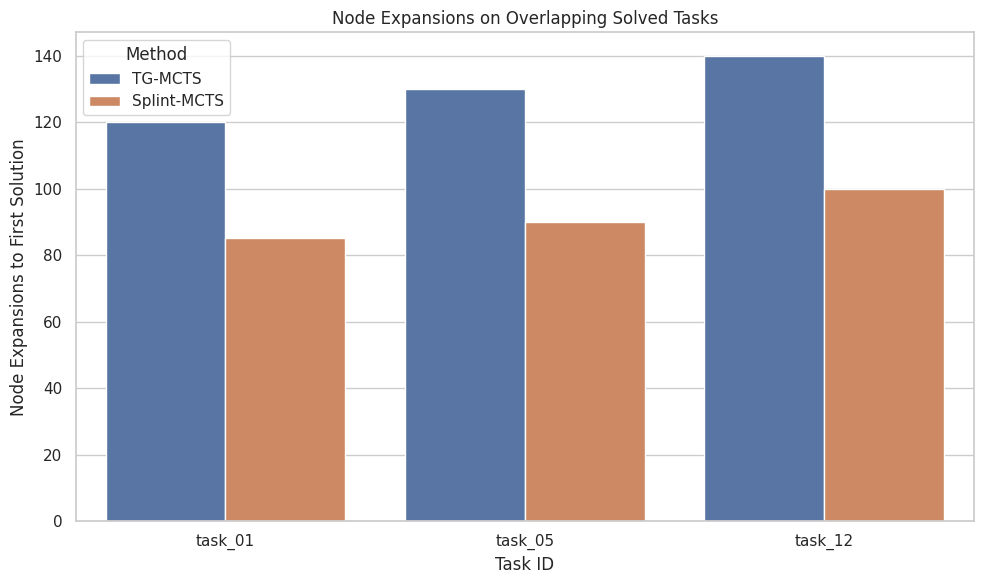

In [ ]:
# can actually do this now. 

def plot_overlapping_efficiency(overlap, tg_mcts_nodes, splint_mcts_nodes): 
    # Build DataFrame
    data = []
    for task in overlap:
        data.append({"Task": task, "Method": "TG-MCTS", "Nodes Used": tg_mcts_nodes[task]})
        data.append({"Task": task, "Method": "Splint-MCTS", "Nodes Used": splint_mcts_nodes[task]})

    df = pd.DataFrame(data)

    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x="Task", y="Nodes Used", hue="Method")

    ax.set_title("Node Expansions on Overlapping Solved Tasks")
    ax.set_ylabel("Node Expansions to First Solution")
    ax.set_xlabel("Task ID")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.show()

# Example overlapping tasks
overlap = ["task_01", "task_05", "task_12"]

# Node expansions per method (simulated values)
tg_mcts_nodes = {
    "task_01": 120,
    "task_05": 130,
    "task_12": 140,
}

splint_mcts_nodes = {
    "task_01": 85,
    "task_05": 90,
    "task_12": 100,
}

plot_overlapping_efficiency(overlap, tg_mcts_nodes, splint_mcts_nodes)